In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
# Warning
import warnings
warnings.filterwarnings('ignore')
# Font
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

## 이탈률 - 최근 구매일 기준으로

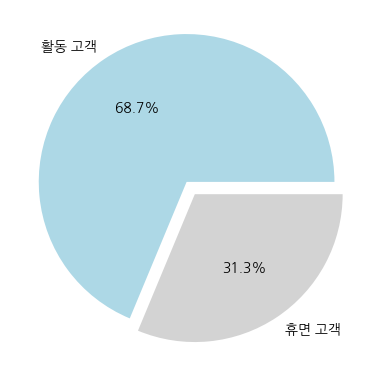

In [2]:
Member = pd.read_csv('/home/piai/다운로드/A2/Member_data.csv', low_memory = False)
Sales = pd.read_csv('/home/piai/다운로드/A2/Sales_data.csv', low_memory = False)

# Na 제거
Member = Member.dropna(axis = 0)
Sales = Sales.dropna(axis = 0)
# 필요없는 column 제거
Member = Member.drop(['결제등록카드'], axis = 1)
Sales = Sales.drop(['주문번호', '배송시작일', '배송완료일', '구매시월령(수정)', '상품명', '물품대분류'], axis = 1)

# 여자 / 기혼 / 자녀 YES : 1 , 남자 / 미혼 / 자녀 NO : 0
Member["성별"] = np.where(Member["성별"] == '여', 1,0)
Member["결혼유무"] = np.where(Member["결혼유무"] == '기혼', 1,0)
Member["자녀여부"] = np.where(Member["자녀여부"] == 'Yes', 1,0)

# Sales와 Memebers 병합
df_merge = pd.merge(Member, Sales, how = 'outer', on = '고객번호')
df_merge = df_merge.dropna(axis = 0)
# 구매일 특문 제거
df_merge['구매일'] = df_merge['구매일'].str.replace(pat = r'\D+', repl = r'', regex = True)

# 같은 고객번호 내에서 구매일 최근거 빼고 다 제거 : 67840개중, 65546개만 남아야 함
df = pd.DataFrame(df_merge[['고객번호', '구매일']]) ;df.reset_index(drop = True)
recency = df.drop_duplicates(['고객번호'], keep = 'last')

# active : 2019년 8월 7일 ~ 2020년 8월 7일 활동 고객
# dormant : 2019년 1월 1일 ~ 2019년 8월 6일 휴면 고객(1년간 활동 없음)
# recency = recency.sort_values('구매일', ascending = True)
active = pd.DataFrame(recency[recency["구매일"] >= '20190807']) # 활동 고객 45043명
dormant = pd.DataFrame(recency[recency["구매일"] < '20190807']) # 휴면 고객 20503명

ratio = [len(active), len(dormant)]
labels = ['활동 고객', '휴면 고객']
colors = ['lightblue', 'lightgray']
explode = [0.1, 0.0]

plt.pie(ratio, labels = labels, autopct = '%.1f%%', explode = explode, colors = colors)
plt.show()

In [3]:
recency = pd.read_csv('/home/piai/다운로드/A2/최근구매일.csv', encoding = 'euc-kr', low_memory = False)
recency = recency.drop(recency.columns[0], axis = 1)
recency.head(10)

,고객번호,최근구매일,가입일,고객번호(가입일제외)
0,201812310749735,20200220,20181231,749735
1,201812310749771,20190513,20181231,749771
2,201812310749774,20190729,20181231,749774
3,201812310749780,20190130,20181231,749780
4,201812310749784,20200723,20181231,749784
5,201812310749787,20200724,20181231,749787
6,201812310749792,20190907,20181231,749792
7,201812310749802,20191219,20181231,749802
8,201812310749811,20190620,20181231,749811
9,201812310749816,20190227,20181231,749816


In [4]:
# churn = 당월 고객 이탈 수 / 월초 고객 수 x 100


In [5]:
# 빈도수 (Frequency) 확인
df.groupby('고객번호').count()

# first_buy : 고객별 첫 구매일
first_buy = df.drop_duplicates(['고객번호'], keep = 'first')
first_buy.head()
first_buy_month = first_buy.구매일.

SyntaxError: invalid syntax (4304192.py, line 7)

In [ ]:
# RECENCY 계산
# 아래 두개는 연도별, 월별 필요할 때 사용
# customer_year = df_merge.구매일.str.split('-').str[0]
# customer_month = df_merge.구매일.str.split('-').str[1]

In [ ]:
Member.select_dtypes(object).columns
# Member.거주지역.unique() # 15개
Member.유입경로.unique() # 10개
# Member.연령.nunique() # 연령 27개

Sales.select_dtypes(object).columns
Sales.고객번호.nunique() # 65732명 -> 15362명 없음
# Sales.물품대분류.nunique() #10개